In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TENSORFLOW LIBRARIES NEEDED 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
# sklearn's train test splitter 
from sklearn.model_selection import train_test_split

%matplotlib inline

## Generate the data 

In this exercise we will demonstrate how to do p-regularization. We will first create a network that overfits and then we will regularize it using L2 and L1 norms. 

We start by generating fake data: 


$$ y = x \sin{x} + \epsilon $$ 

where $\epsilon$ is a normal noise. 

In [2]:
num_points = 30 

x = np.linspace(0,5,num_points)
y = x * np.sin(x) + np.random.normal(loc=0, scale=1, size=num_points)

from sklearn.model_selection import train_test_split
# SPLIT THE DATA TO TRAIN TEST  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


# also generate data of the true function y = x*sin(x) 
# we will be using x_b for all predictions below 
x_b = np.linspace(0,5,100)
y_b = x_b*np.sin(x_b)

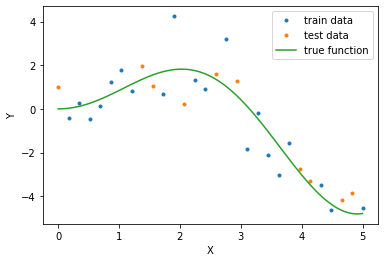

In [3]:
plt.plot(x_train,y_train, '.', label='train data')
plt.plot(x_test,y_test, '.', label='test data')
plt.plot(x_b, y_b, '-', label='true function')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

## Build an unregularized NN.
Create a FCNN with 5 layers, each with 100 nodes 

In [4]:
# I like to name my models 
model_1 = models.Sequential(name='Unregularized')

# 5 hidden layer with 100 neurons 
model_1.add(Dense(20, input_shape = (1,), activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))


# output layer, one neuron 
model_1.add(Dense(1, activation='linear'))

model_1.summary()

Model: "Unregularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
___________________________________________________

In [5]:

model_1.compile(loss='MSE',optimizer=optimizers.Adam(learning_rate=0.001)) 
history_1 = model_1.fit(x_train, y_train,  validation_data=(x_test,y_test), epochs=1500, batch_size=10, verbose=0) 


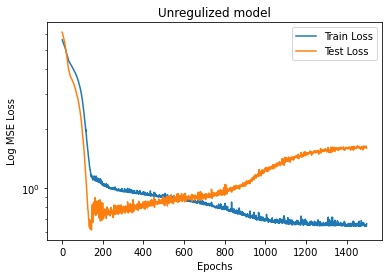

In [6]:
plt.title("Unregulized model")
plt.semilogy(history_1.history['loss'], label='Train Loss')
plt.semilogy(history_1.history['val_loss'],  label='Test Loss')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Log MSE Loss')
plt.legend()

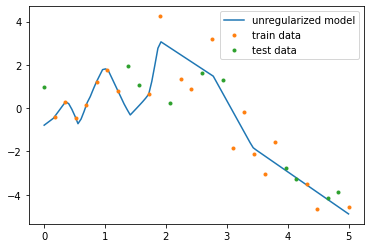

In [7]:
# use the fitted model to predict for x and observe the overfitting 
y_hat_m1 = model_1.predict(x_b)


plt.plot(x_b, y_hat_m1, label = 'unregularized model')
plt.plot(x_train,y_train, '.', label='train data')
plt.plot(x_test,y_test, '.', label='test data')
plt.legend()

## Now let's regularize 


In [17]:
model_2 = models.Sequential(name='L2regularized')

myl2_reg = regularizers.l2(0.01)

# hidden layer with 100 neurons (or nodes)
model_2.add(Dense(20, input_shape = (1,), activation='relu', kernel_regularizer=myl2_reg))
model_2.add(Dense(20, activation='relu', kernel_regularizer=myl2_reg))
model_2.add(Dense(20, activation='relu', kernel_regularizer=myl2_reg))

model_2.add(Dense(20, activation='relu', kernel_regularizer=myl2_reg))
model_2.add(Dense(20, activation='relu', kernel_regularizer=myl2_reg))

# output layer, one neuron 
model_2.add(Dense(1, activation='linear'))


In [18]:
model_2.compile(loss='MSE',optimizer=optimizers.Adam(learning_rate=0.001)) 
history_2 = model_2.fit(x_train, y_train,  validation_data=(x_test,y_test), epochs=1500, batch_size=10, verbose=0) 


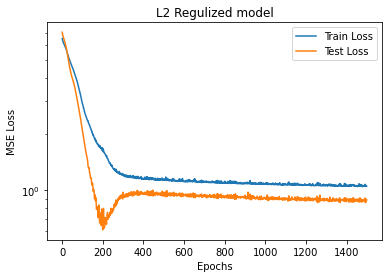

In [19]:
plt.title("L2 Regulized model")
plt.semilogy(history_2.history['loss'], label='Train Loss')
plt.semilogy(history_2.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

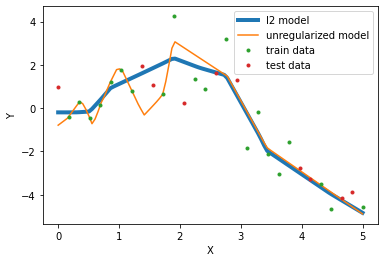

In [20]:
y_b_hat_l2 = model_2.predict(x_b)


plt.plot(x_b, y_b_hat_l2, lw=4, label='l2 model')
plt.plot(x_b, y_hat_m1, label = 'unregularized model')
plt.plot(x_train,y_train, '.', label='train data')
plt.plot(x_test,y_test, '.', label='test data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

## Now with L1 

In [29]:
model_3 = models.Sequential(name='L1regularized')
myl1_reg = regularizers.l1(0.01) 
# hidden layer with 100 neurons (or nodes)
model_3.add(Dense(20, input_shape = (1,), activation='relu'))
model_3.add(Dense(20, activation='relu', kernel_regularizer=myl1_reg))
model_3.add(Dense(20, activation='relu', kernel_regularizer=myl1_reg))

model_3.add(Dense(20, activation='relu', kernel_regularizer=myl1_reg))
model_3.add(Dense(20, activation='relu', kernel_regularizer=myl1_reg))

# output layer, one neuron 
model_3.add(Dense(1, activation='linear'))

In [30]:
model_3.compile(loss='MSE',optimizer=optimizers.Adam(learning_rate=0.001)) 
history_3 = model_3.fit(x_train, y_train,  validation_data=(x_test,y_test), epochs=1500, batch_size=10, verbose=0) 


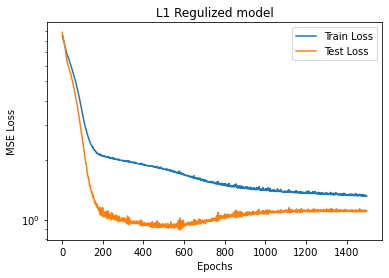

In [31]:
plt.title("L1 Regulized model")
plt.semilogy(history_3.history['loss'], label='Train Loss')
plt.semilogy(history_3.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

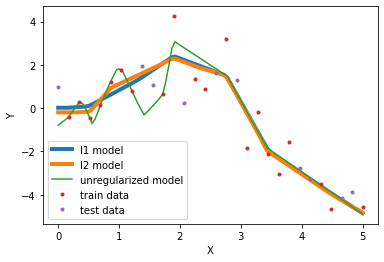

In [32]:
y_b_hat_l1 = model_3.predict(x_b)




plt.plot(x_b, y_b_hat_l1, lw=4, label='l1 model')
plt.plot(x_b, y_b_hat_l2, lw=4, label='l2 model')
plt.plot(x_b, y_hat_m1, label = 'unregularized model')
plt.plot(x_train,y_train, '.', label='train data')
plt.plot(x_test,y_test, '.', label='test data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()